### Problem statement :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. <br>

- They want to stand out from other service providers and make huge profits.<br>
- They want to understand the factors affecting the demand for these shared bikes in the American market.<br>

The company wants to know:- <br>

- Which variables are significant in predicting the demand for shared bikes.<br>
- How well those variables describe the bike demands

To help the company we will use <b> Linear Rregression model and make predictions . </b> <br>

<b>```Steps we will follow are :-```
1. Understanding the data 
- Visualizing data
- Data preparation
- Spliting data into training and testing data sets
- Buliding linear model
- Residual analysis for train data set
- Making predictions using final model
- Model evaluation </b>

### Step 1 : Understanding the data

In [1]:
# importing numpy and pandas
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# import data and read the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### data dictionary -
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registere

In [2]:
df.shape    # there are 730 rows and 16 columns

(730, 16)

In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Obssrvation :-
- we see that there are no null values in data set 
- we observe that season and weathersit are int type 

In [5]:
# dropping instant variable - since it is not necessary for model buliding (instant is similar to index)
# also dropping casual and registered variable as cnt(target variable) is sum of these 2 variables , we will drop after understanding the correaltion between them
df.drop(columns=['instant'],axis=1,inplace=True)
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


### **Note :- ```The target variable is "cnt"```**
**'cnt' variable indicates the total number of bike rentals, including both casual and registered**<br>
we need to indentify which driver variables will incerase the "cnt" , <br>
dependent variable - cnt

Lets try to understand data set more clearly and note down the **steps we will follow**
- since cnt is target variable and is sum of casual,registered varibale , we will ```remove casual and registered``` from data set
- From the data set the ```numeric variables are - temp,atemp,hum,windspeed```
- From data set ```categorical variables are - dteday,season,mnth,weekday,weathersit and yr,holiday,workingday```(basically 1's/0's i.e, yes/no)
- We can observe in the dataset that some of the variables like ```'weathersit' and 'season'``` have values as 1, 2, 3, 4 which have specific labels associated with them , we ```convert such feature values into categorical string values``` (by seeing the data dictionary)
- we can ```introduce one more varibale non_working_day``` from workingday 

In [6]:
# understanding the correlation between target variable and casual,registered
print("correlation b/w cnt and causal is ",round (df.cnt.corr(df.casual),2) )
print("correlation b/w cnt and registered is ",round (df.cnt.corr(df.registered),2) )

correlation b/w cnt and causal is  0.67
correlation b/w cnt and registered is  0.95


we can see that they are highly correlated , and maybe we wish to include in model , but the fact that cnt is derived from sum of these 2 variables only ,we can not add these variables(casual,registered) in model, hence we decided to remove them.

In [7]:
df.drop(columns=['casual','registered'],inplace=True)
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801


In [8]:
# lets convert seasons to categorical variable 
df.season = df.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
# lets convert weathersit to categorical variable 
df.weathersit.value_counts()
def weather_change(x):
    if x==1: return "clear"
    if x==2: return "cloudy"
    if x==3: return "light_rain"
    if x==4: return "heavy_rain"
    
df.weathersit = df.weathersit.apply(weather_change)
df.weathersit.value_counts()

clear         463
cloudy        246
light_rain     21
Name: weathersit, dtype: int64

In [10]:
# lets convert mnth,weekday to categorical variable
df.mnth = df.mnth.astype("category")
df.weekday = df.weekday.astype("category")

In [11]:
# lets introduce non_working_day ,which is nothing but opposite of working day
# not necessary to add this variable but for clear understanding i wish to add it
df['non_working_day']=df['workingday'].map({1:0,0:1})
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,non_working_day
0,01-01-2018,spring,0,1,0,1,1,cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,spring,0,1,0,2,1,cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0


### step 2: Visualizing data

In [12]:
# importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

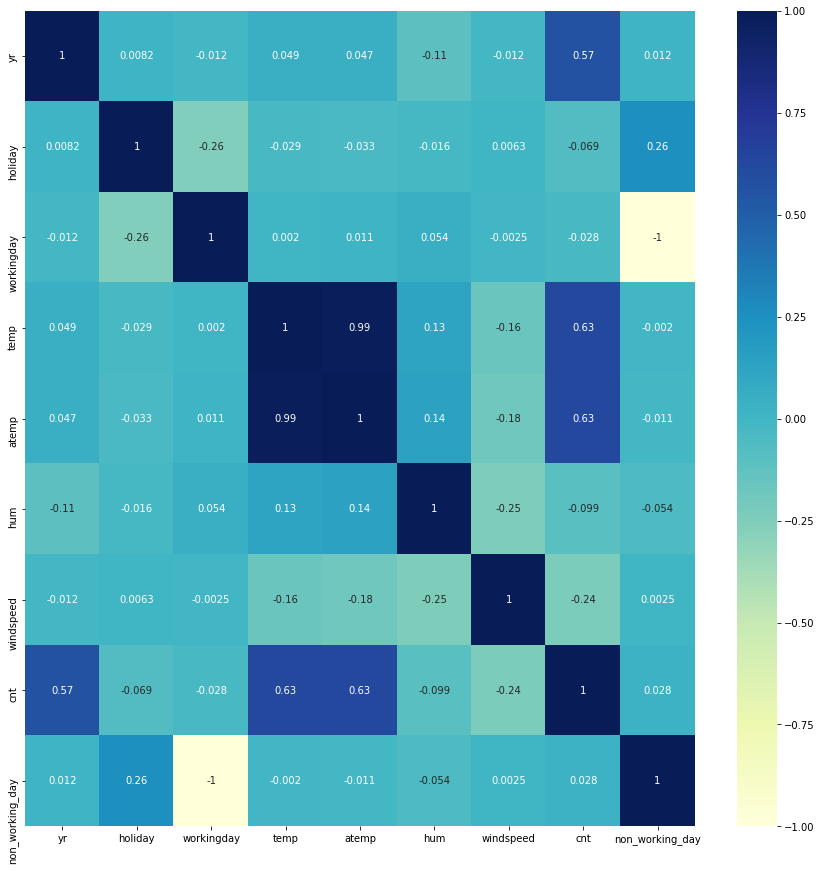

In [13]:
#lets plot a heatmap and understand which variables are positively correalted and which are not
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

we observe that correlation between cnt(Target/dependent variable) and 
- registered is 0.95 (previosuly done)
- casual is 0.67  (previosuly done)
- temp and atemp is 0.63  
- year is 0.57   #implies that demand has increased in 2019 when comapred to last year(2018)
- non_working_day is 0.28
- working day , holiday , hum , windspeed are negatively correlated with target variable(dependent variable)<br>

**We observe that temp and atemp have 0.99 correlation** which means they are interrealted i.e, if we include both atemp and temp it will violate the assumption and tend to **multicollinarity**.

In [14]:
#drop atemp varibale as it is clearly understood that will it is not necesaary to include in the model building
# we also drop non_working_day ,we already have workingday variable so non_working_day is not necessary
df.drop(columns=['atemp','non_working_day'],inplace=True)
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

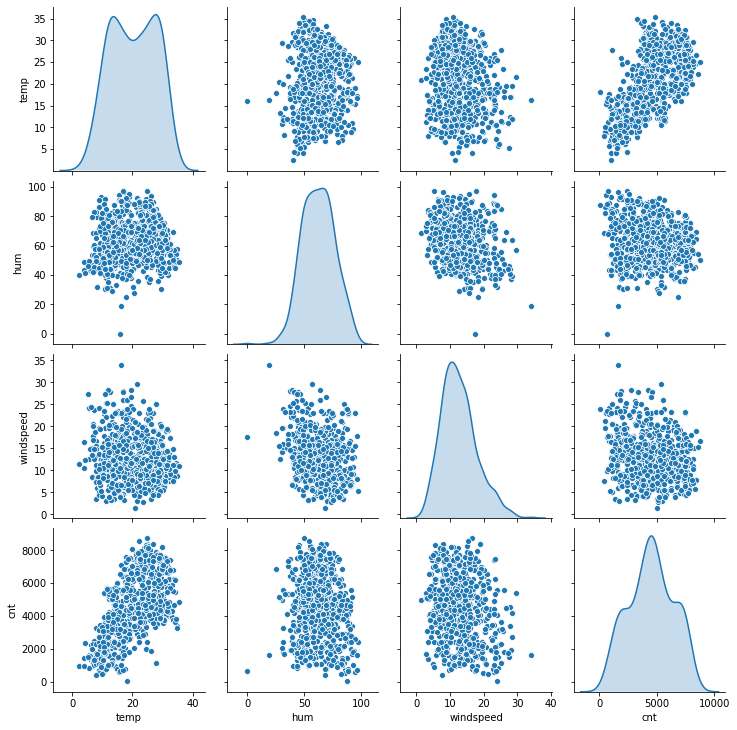

In [15]:
# vizualizing numeric variables
num_vars=['temp','hum','windspeed','cnt']
sns.pairplot(data=df[num_vars],diag_kind='kde')
plt.show()

**Q) Looking at the pair-plot among the numerical variables, which one has the highest correlation
with the target variable?<br>**
A)<u> temp have correlation of 0.63 with the target variable (cnt)</u><br>
   Also registered and casual correlation is 0.95 and 0.67 respectively (but we don’t consider it as highest correlation with target variable because target variable is sum of casual and registered ,that means they will anyhow have high correlation with target variable)

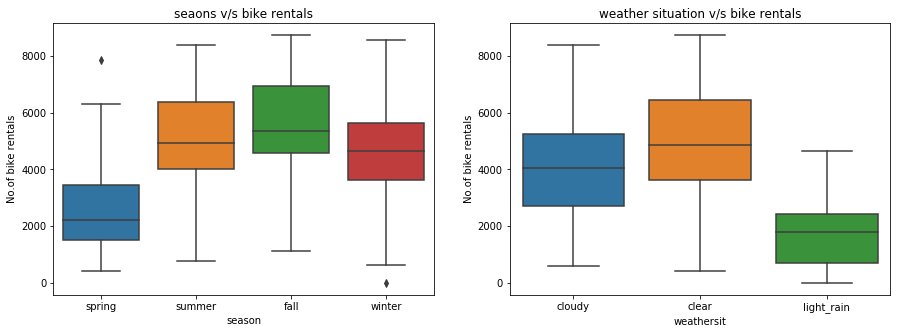

In [16]:
# vizualising categorical variable
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x="season",y="cnt",data=df)
plt.title("seaons v/s bike rentals")
plt.ylabel("No.of bike rentals")

plt.subplot(1,2,2)
sns.boxplot(x="weathersit",y="cnt",data=df)
plt.title("weather situation v/s bike rentals")
plt.ylabel("No.of bike rentals")

plt.show()

obseravtion :-
- bike rentals are more in fall and less in spring season (less than the 25% of other seaosn) (from left plot)
- bike rentals didn't happen during heavy rains   (from right plot)
- bike rentals are more during clear weather situation and very less during light rain (from right plot)

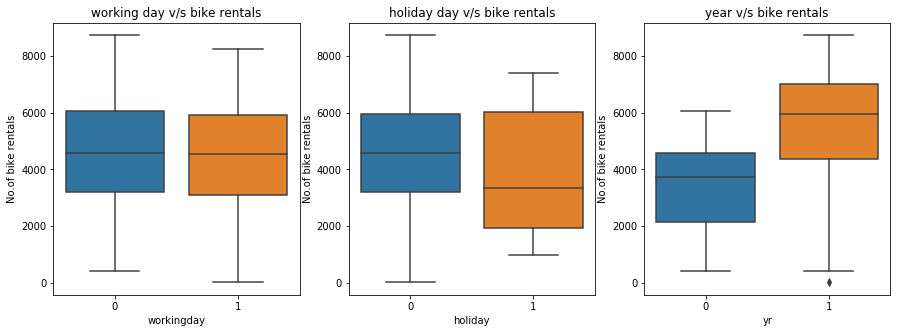

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="workingday",y='cnt',data=df)
plt.title("working day v/s bike rentals")
plt.ylabel("No.of bike rentals")

plt.subplot(1,3,2)
sns.boxplot(x="holiday",y='cnt',data=df)
plt.title("holiday day v/s bike rentals")
plt.ylabel("No.of bike rentals")

plt.subplot(1,3,3)
sns.boxplot(x="yr",y='cnt',data=df)
plt.title("year v/s bike rentals")
plt.ylabel("No.of bike rentals")

plt.show()

obseravtion :-
- There is no much difference in no.of bike rentals on working days and non working days 
- we can see that median rentals of bike on holiday is equal to 25th percentile of rental on non-holiday days
- There is drastic increase in bike rentals when comapred to previous yr(2018) , the 75th percentile of last yr rentals is approx. equal to 25th percentile of this years rental count.

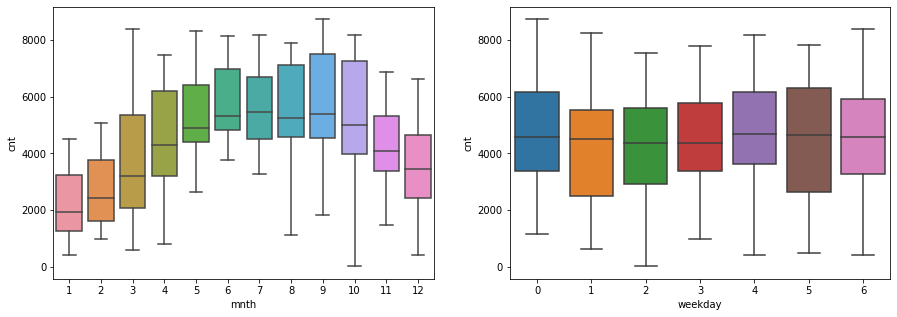

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x="mnth",y='cnt',data=df)
plt.subplot(1,2,2)
sns.boxplot(x="weekday",y='cnt',data=df)
plt.show()

observation:-
- we can clearly see that the mid months have highest rentals ,months 6,8,9,10 i.e,June,August,September,October have more rentals than other months
- January month being the least favourable month ,since rentals are least when comapred to other months
- The median of rental count is almost same on all weekdays, but highest rentals happen on sundays

<b>Q)From your analysis of the categorical variables from the dataset, what could you infer about
their effect on the dependent variable? <br></b>
A) From categorical analysis we found that 
- ```Fall season``` has highest bike rentals and spring having least bike rentals compared to other seasons
- There are no bike rentals during heavy rains and highest in ```clear weather``` conditions
- ```Working day``` doesnt effect the bike rentals , as both the boxplots (working day -0 and 1) are same
- On ```holidays``` bike rentals are more (median rentals of bike on holiday is equal to 25th percentile of rental on non-holiday days)
- There is ```drastic increase in bike rentals this year(2019)``` when compared to previous yr(2018) (75th percentile of last yr rentals is approx. equal to 25th percentile of this years rental count)
- we can clearly see that the months 6,8,9,10 have highest rentals i.e,```June, August, September, October``` have more rentals than other months (January month being the least favourable month ,since rentals are least when compared to other months)
- The median of rental count is almost same on all weekdays, but highest rentals happen on ```sundays ```

<b>Q)What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.</b>
- Quantile-Quantile (Q-Q) plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal, exponential or Uniform distribution. we can also say QQ plots are actually a way to visualize whether something is normally distributed.
- It helps to determine if two data sets come from populations with a common distribution.
- This helps in a scenario of linear regression when we have training and test data set received separately and then we can confirm using Q-Q plot that both the data sets are from populations with same distributions.
- The assumption of normality is an important assumption for many statistical tests; you assume you are sampling from a normally distributed population. 
- The normal Q Q plot is one way to assess normality and hence it is important while validating the assumption of normality.
- All point of quantiles lie on or close to straight line at an angle of 45 degree from x – axis. It indicates that two samples have similar distributions.
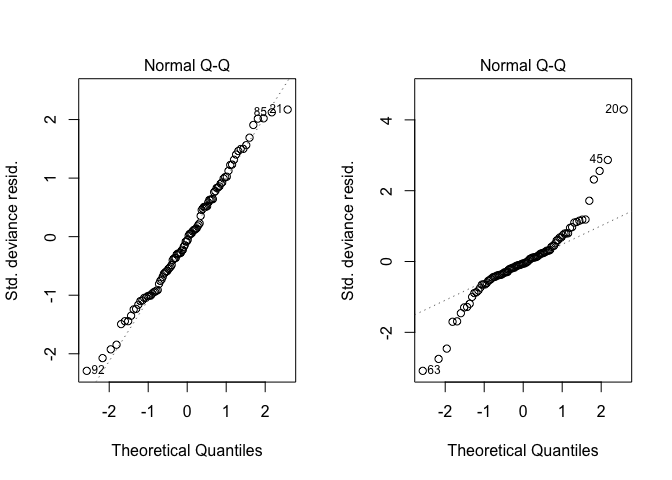

<b>Q)Explain the Anscombe’s quartet in detail.<br></b>
- Anscombe’s Quartet can be defined as a group of four data sets which are nearly identical in simple descriptive statistics, but there are some peculiarities in the dataset that fools the regression model if built. They have very different distributions and appear differently when plotted on scatter plots.
- It explains the importance of plotting the graphs before analysing and model building. The important features in the dataset must be visualised before implementing any machine learning algorithm on them which will help to make a good fit model
- The four datasets can be described as:<br>
    
Dataset 1: this fits the linear regression model pretty well.<br>
Dataset 2: this could not fit linear regression model on the data quite well as the data is non-linear.<br>
Dataset 3: shows the outliers involved in the dataset which cannot be handled by linear regression model<br>
Dataset 4: shows the outliers involved in the dataset which cannot be handled by linear regression model<br>
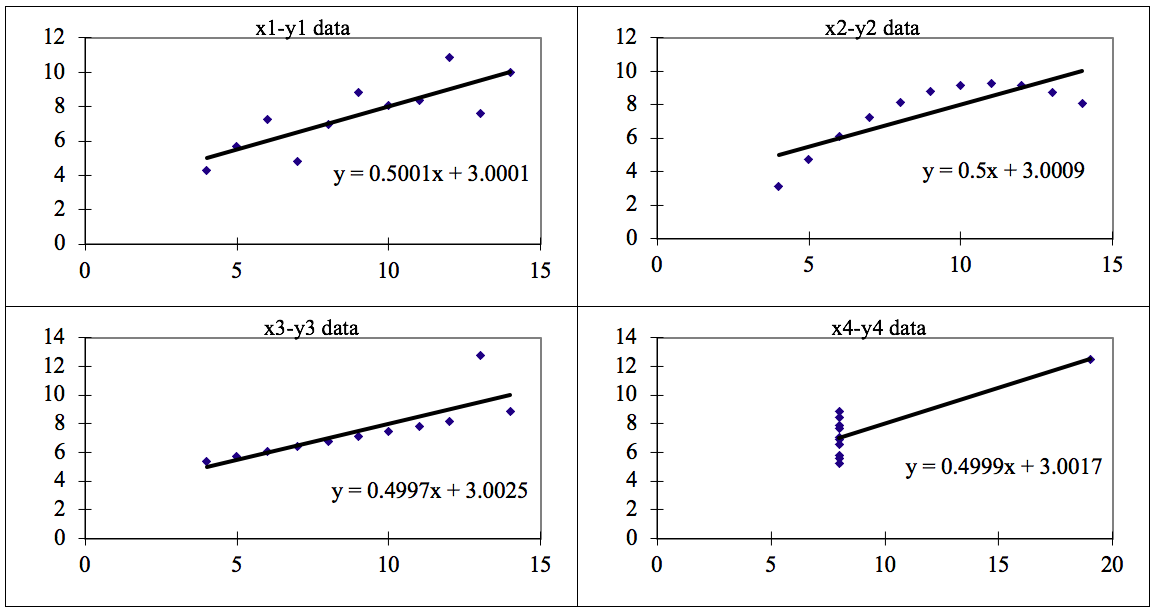

In [19]:
# we will remove dteday since we already have holiday,woekingday,weekday in our data set. 
#so by general business undersatnding we will remove dteday and keep other other variables relates to date as it is.
df.drop('dteday',axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,2,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,3,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,4,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,5,1,clear,9.305237,43.6957,12.522300,1600


### step 3: Data preparation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(2), float64(3), int64(4), object(2)
memory usage: 53.7+ KB


**Dummy variable**<br>
- we see that season,mnth,weekday,weathersit are categorical variables with levels , we need to change these levels into integer as well.<br>
- we need to use dummy variables 

<b>Q)Why is it important to use drop_first=True during dummy variable creation? <br></b>
A) <u>drop_first=True helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.</u>
    <br>
- during dummy variable creation all the levels of a categorical variable are converted to columns with values 1's and 0's . 1 indicating true/yes and 0 indicating false/no<br>
- ex:- in season variable after dummy variable creation.You don't need four columns. You can drop the fall column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [21]:
# chnaging mnth and weekday values i.e, giving appropriate names to the levels
df.mnth = df.mnth.astype(str)
df.weekday = df.weekday.astype(str)

In [22]:
df.mnth = df.mnth.map({'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sept','10':'Oct','11':'Nov','12':'Dec'})
df.weekday = df.weekday.map({'0':'Sun','1':'Mon','2':'Tue','3':'Wed','4':'Thur','5':'Fri','6':'Sat'})

In [23]:
print(df.mnth.value_counts())
print(df.weekday.value_counts())

Jul     62
Jan     62
Aug     62
May     62
Dec     62
Oct     62
Mar     62
Sept    60
Apr     60
Nov     60
Jun     60
Feb     56
Name: mnth, dtype: int64
Mon     105
Tue     105
Fri     104
Sun     104
Thur    104
Wed     104
Sat     104
Name: weekday, dtype: int64


In [24]:
# Dummy variables creation
season_ = pd.get_dummies(df['season'],drop_first=True)
mnth_ = pd.get_dummies(df['mnth'],drop_first=True)
weekday_ = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_ = pd.get_dummies(df['weathersit'],drop_first=True)
# lets see how does season_ look like
season_.head(4)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0


In [25]:
df = pd.concat([df,season_,mnth_,weekday_,weathersit_ ], axis = 1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'cloudy',
       'light_rain'],
      dtype='object')

In [26]:
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,cloudy,light_rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

### step 4: Spliting data into training and testing data sets

In [28]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df,train_size=0.7,random_state=100)

In [29]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [30]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,cloudy,light_rain
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,1,0


<b>Q)What is scaling? Why is scaling performed? What is the difference between normalized scaling
    and standardized scaling?</b>
- Scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
- It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.
- Scaling helps with interpretation and faster convergence of gradient descent.
- So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:
 1. Normalized (Min-Max scaling) [0,1]
 2. Standardisation (mean-0, sigma-1) 
    
<u>Normalized scaling </u>
- This is also known as min-max scaling beacuse the normalization is done using the formula `x-xmin / xmax-xmin`
- The values will range from 0-1 only i.e, they are compressed between 0 and 1
    
<u>Standardized scaling</u>
- In standardized scaling the values are centered around the mean with a unit standard deviation i.e, mean becomes 0 and standard deviation of the values becomes 1
- It is doing using the formula `x-mu / sigma`

In [31]:
# Rescaling the features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scaling necessary variables
num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,cloudy,light_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


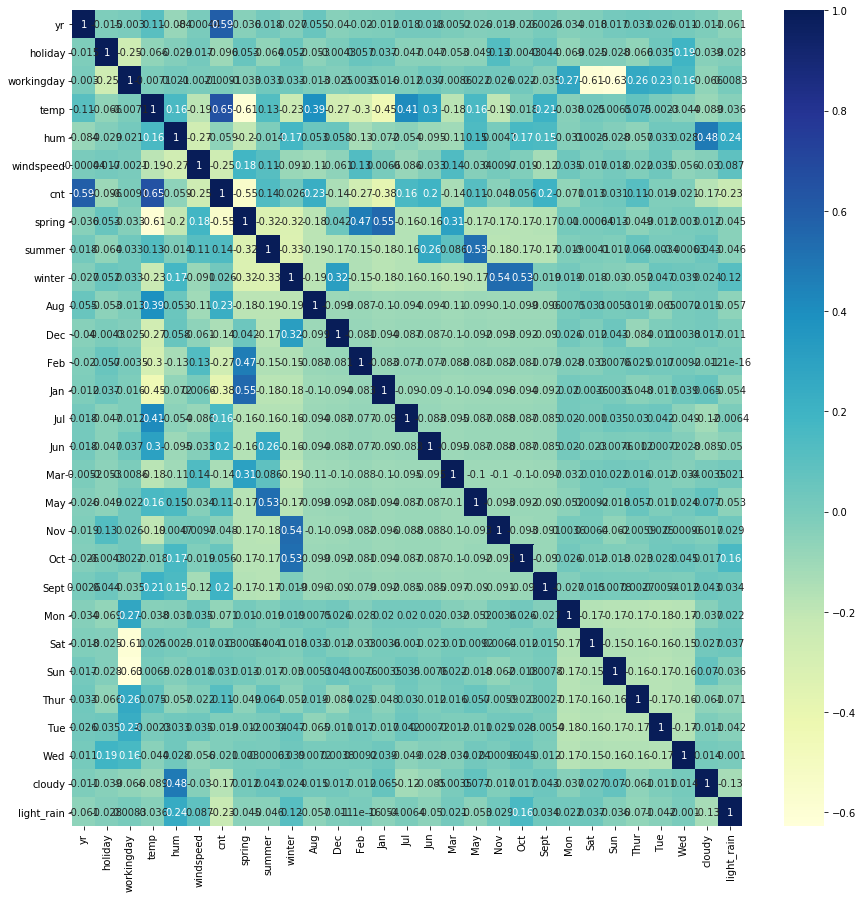

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

### step 5: Buliding linear model

In [33]:
df_train.shape #510 rows and 29 columns (1 target variable and 28 independent variable)

(510, 29)

As there are many prectior variables ,we use **RFE** ,recursive feature elimination. If the independent variables are > 20 it is advisable to use RFE.

In [34]:
# defining x and y variables
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
# importing required packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [36]:
# Finding out which variables to eliminate using RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('cloudy', True, 1),
 ('light_rain', True, 1)]

In [37]:
# independent variables list after elimination process
cols = X_train.columns[rfe.support_]
cols  # cols which we will use to build model

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept', 'cloudy', 'light_rain'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]   # cols which we eliminated 

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

**we will use statsmodel for building the linear model**
#### model 1:

In [39]:
X = X_train[cols]
X_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          8.15e-189
Time:                        20:12:55   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
Dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sept           0.0755      0.017      4.466      0.000       0.042       0.109
cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
light_rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets check for multicollinearity using **VIF**

In [40]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
13,cloudy,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


removing hum varibale because of high vif value
#### model 2:

In [41]:
# Dropping hum column as it has high vif
X = X.drop('hum',axis=1)
X_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          4.75e-186
Time:                        20:12:55   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
Dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sept           0.0687      0.017      4.015      0.000       0.035       0.102
cloudy        -0.0801      0.009     -9.198      0.000      -0.097      -0.063
light_rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,Jul,1.59
12,cloudy,1.57


Vif of temp is high(5.17) but ***we decided not to drop 'temp' based on business knowledge that temperature can be an important factor for a business like bike rentals***, and wanted to retain 'temp'.We also noticed using scatter plot that temp had highest correlation with target variable 'cnt'.(if vif>10 we need to eliminate , if vif>5 we need to inspect)<br>
We see that "Nov" p-value is high and decide to remove it.
#### model 3:

In [43]:
# removing Nov,as it has high p value
X = X.drop('Nov',axis=1)
X_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          2.74e-186
Time:                        20:12:55   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.000       0.167       0.290
yr             0.2343      0.008     28.573      0.000       0.218       0.250
holiday       -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp           0.4581      0.035     13.031      0.000       0.389       0.527
windspeed     -0.1594      0.025     -6.291      0.000      -0.209      -0.110
spring        -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer         0.0404      0.015      2.635      0.009       0.010       0.070
winter         0.0774      0.017      4.438      0.000       0.043       0.112
Dec           -0.0283      0.016     -1.731      0.084      -0.060       0.004
Jan           -0.0451      0.018     -2.467      0.014      -0.081      -0.009
Jul           -0.0499      0.019     -2.686      0.007      -0.086      -0.013
Sept           0.0742      0.017      4.373      0.000       0.041       0.108
cloudy        -0.0793      0.009     -9.089      0.000      -0.096      -0.062
light_rain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
8,Jan,1.65
9,Jul,1.59
11,cloudy,1.57
10,Sept,1.34


We see that "Dec" p-value is high so we decide to remove it.
#### model 4:

In [45]:
# removing Dec,as it has high p value
X = X.drop('Dec',axis=1)
X_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          8.14e-187
Time:                        20:12:56   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.000       0.156       0.275
yr             0.2343      0.008     28.517      0.000       0.218       0.250
holiday       -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp           0.4721      0.034     13.772      0.000       0.405       0.539
windspeed     -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring        -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer         0.0434      0.015      2.845      0.005       0.013       0.073
winter         0.0757      0.017      4.335      0.000       0.041       0.110
Jan           -0.0383      0.018     -2.138      0.033      -0.073      -0.003
Jul           -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sept           0.0764      0.017      4.506      0.000       0.043       0.110
cloudy        -0.0793      0.009     -9.067      0.000      -0.096      -0.062
light_rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,Jul,1.59
10,cloudy,1.56
9,Sept,1.34


We see that "Jan" p-value is high so we decide to remove it.
#### model 5:

In [47]:
# removing jan,as it has high p value
X = X.drop('Jan',axis=1)
X_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          5.06e-187
Time:                        20:12:56   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
yr             0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer         0.0465      0.015      3.051      0.002       0.017       0.076
winter         0.0817      0.017      4.730      0.000       0.048       0.116
Jul           -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sept           0.0768      0.017      4.517      0.000       0.043       0.110
cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
light_rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,Jul,1.58
9,cloudy,1.55
8,Sept,1.34
10,light_rain,1.08


We see that "Jul" p-value is high so we decide to remove it.
#### model 6:

In [49]:
# removing Jul,as it has high p value
X = X.drop('Jul',axis=1)
X_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          1.47e-186
Time:                        20:12:56   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.000       0.133       0.249
yr             0.2341      0.008     28.237      0.000       0.218       0.250
holiday       -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp           0.4777      0.033     14.423      0.000       0.413       0.543
windspeed     -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring        -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer         0.0621      0.014      4.350      0.000       0.034       0.090
winter         0.0945      0.017      5.630      0.000       0.062       0.127
Sept           0.0910      0.016      5.566      0.000       0.059       0.123
cloudy        -0.0787      0.009     -8.938      0.000      -0.096      -0.061
light_rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,cloudy,1.55
7,Sept,1.23
9,light_rain,1.08
1,holiday,1.04


We see that "spring" p-value is high so we decide to remove it.
#### model 7:

In [51]:
# removing spring,as it has high p value
X = X.drop('spring',axis=1)
X_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          2.83e-186
Time:                        20:12:56   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.017      7.508      0.000       0.093       0.159
yr             0.2329      0.008     27.962      0.000       0.216       0.249
holiday       -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp           0.5480      0.020     27.360      0.000       0.509       0.587
windspeed     -0.1532      0.025     -6.039      0.000      -0.203      -0.103
summer         0.0881      0.010      8.437      0.000       0.068       0.109
winter         0.1293      0.011     12.314      0.000       0.109       0.150
Sept           0.1012      0.016      6.330      0.000       0.070       0.133
cloudy        -0.0784      0.009     -8.844      0.000      -0.096      -0.061
light_rain    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,summer,1.57
7,cloudy,1.48
5,winter,1.37
6,Sept,1.20
8,light_rain,1.08
1,holiday,1.04


### Observation from model 7 : lets look at the statistics -
- All p-values are 0.000 this implies, the coefficients are significant 
- VIF is also < 4
- The overall model is fit ,since F-statistics = 271.9 and P(F-statistics) = 2.83e-186
- R squred is 0.830 and Adj R squared is 0.827 (variance is explained nicely)

### Equation of best fit surface is :-<br>
`cnt = 0.126 +(yr×0.233)-(holiday×0.99)+(temp×0.548)−(windspeed×0.153)+(summer×0.088)+(winter×0.129)+(sept×0.101)-(cloudy×0.078)−(light_rain×0.283)`

### Interpretation of coefficients :-
- `const`:  in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.126 units
- `yr`: one unit increase in yr variable, increases the bike rental numbers by 0.233 units.
- `holiday`: one unit increase in holiday variable, decreases the bike rental numbers by 0.099 units. (this can also be interpreted like- when there is no holiday the bike rentals increases 0.99 units)
- `temp`: one unit increase in temp variable, increases the bike rental numbers by 0.548 units.
- `windspeed`: one unit increase in windspeed variable, decreases the bike rental numbers by 0.153 units.
- `summer`: one unit increase in summer variable, increases the bike rental numbers by 0.088 units.
- `winter`: one unit increase in winter variable, increases the bike rental numbers by 0.129 units.
- `sept`: one unit increase in sept variable, increases the bike rental numbers by 0.101 units.
- `cloudy`: one unit increase in cloudy variable, decreases the bike rental numbers by 0.078 units.
- `light_rain`: one unit increase in light_rain variable, decreases the bike rental numbers by 0.283 units.

<b>Q) Explain the linear regression algorithm in detail.</b>
- Regression falls under supervised learning methods and Linear regression is supervised learning algorithm.
- `linear regression` is a statistical technique to understand the relationship between one dependent variable and several independent variables. 
- The `objective` of linear regression is to find a linear equation that can best determine the value of dependent variable Y for different values of independent variable in X.
- There are 2 `types` of linear regression 
    1. Simple linear regression - (equation y = B<sub>0</sub>+B<sub>1</sub>X )
    2. Multiple linear regression - (equation y = B<sub>1</sub>X<sub>1</sub>+B<sub>2</sub>X<sub>2</sub>+......+B<sub>0</sub> )
- we use `least sum of squares` i.e, RSS (residual sum of squares) to best fit the line. we optimize the values of the coefficients by iteratively minimizing the error of the model on the training data.This operation is called `Gradient Descent`.We select coefficients at random and then iteratively using sum of squared errors and learning rate (alpha) we find the optimal cost function.
- There are four `assumptions` associated with a linear regression model:
    1. Linearity: The relationship between X and the mean of Y is linear.
    2. Homoscedasticity: The variance of residual is the same for any value of X.
    3. Independence: Observations are independent of each other.
    4. Normality: For any fixed value of X, Y is normally distributed.
- There are 2 packages for free in python which can be used for `building the model`
    1. SkLearn 
    2. Statsmodel.api
- The data is divided into test and train sets. Model is build on train test and `prediction` are made on test set 
- `Aspects` to be considered in Multiple Linear Regression :-
    1. Overfitting - model may end up memorizing the points.Then such model will not accurately make prediction 
    2. Multicollinearity - refers to phenomenon having interrealted independent variables.Which can be identified using pair plots and checking VIF=1/(1-R squared).Removing the High VIF variables one by one is advisable. Dropping variables,creating new variables,variable tranformation are ways to deal with multicollinearity.
    3. Feature selection - Manual,automated (RFE,regularization), balanced approach can be used for slecting the features.
- `Dummy variables` are used when data set has categorical variables. `Scaling` is done for better interpretation and fast convergence of gardient descent.
- The `strength` of the Linear regression model can be assesssed using R squared = 1-(RSS/TSS) which explains the variance. 
- Adjusted R squared =1-((1-R squared)(N-1)/(N-P-1)) ,AIC,BIC etc used for model comparisons.
- Using the p values we can determine whether the coefficients are significant or not.Using F or t-statistics we determine whether the overall model fit is significant or not.

<b> Q)What is Pearson’s R?</b>
- Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables
- If the variables tend to go up and down together, the correlation coefficient will be positive.
- Pearson's correlation coefficient (r) for continuous (interval level) data ranges from -1 to +1.
- -1 means there is a strong negative correlation and +1 means that there is a strong positive correlation and 0 means that there is no correlation (this is also called zero correlation).
    

<b>Q)You might have observed that sometimes the value of VIF is infinite. Why does this happen?</b>
- VIF is measure of how well a predictor variable is related with other variables ,excluding the target variable. 
- If VIF is high it means that there is multicollinearity.Multicollinearity is phenonmenon of having related predictor variables.
- VIF ,variance inflation factor =1/(1-R squared) 
- If there is a `perfect correlation between 2 variables` then `VIF = infinite` .In such case we eliminate the variable (while building the linear regression model)
- If VIF>10 we eliminate variable .If VIF>5 varibale is worth inspecting.If VIF<5 no need to eliminate this variable.
    

### step 6: Residual analysis for train data set

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

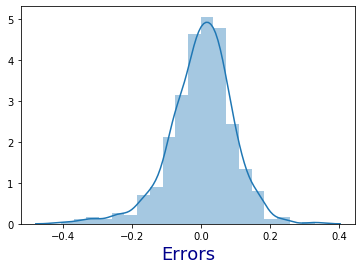

In [53]:
y_train_pred = lr.predict(X_sm)
res = y_train - y_train_pred
sns.distplot(res,bins=20)
plt.xlabel("Errors",fontdict={'fontsize':18,'color':'darkblue'})
plt.show()

we see that error terms are normally distributed with mean 0

<b>Q)How did you validate the assumptions of Linear Regression after building the model on the
training set?</b>
- We can do residual analysis to check whether the error terms re normally distributed and mean is 0. 
- Residual analysis is done by plotting a `histogram of error terms` (error = res = y_tain - y_train_pred)
- Error terms are nothing but residulas i.e, y actual values minus y predicted values(are predicted using the model) 
    
- To check whether error terms are independent of each other , we can plot `scatter plot` of error terms with X or y to check for any patterns. we should not be able to indentify any pattern then only it satisfies the assumption.
    
- To check the absences of multicollinearity we can plot `heat map` and also check the VIF(variance_inflation_factor)
    

### step 7: Making predictions using final model

In [54]:
# we need to first scale as we did for train set
# scaling necessary variables
num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,cloudy,light_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# assinging variables to x and y 
y_test = df_test.pop("cnt")
X_test = df_test[cols]

In [56]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.drop(columns=['hum','Nov','Dec','Jan','Jul','spring'],axis=1,inplace=True)

In [57]:
y_test_pred = lr.predict(X_test_sm)

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)  #r2 score for test set

0.7941977535477243

In [59]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)   #r2score for train test

0.8303450237489228

Since there is not major difference between the r2 scores we can accept model 7.

### step 8: Model evaluation 

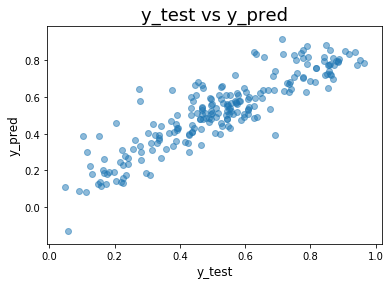

In [60]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha=0.5)
plt.title('y_test vs y_pred', fontsize = 18)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_pred', fontsize = 12)  
plt.show()

## Conclusion :-
We can see that the equation of our best fitted line is:<br>
### ***cnt = 0.126 +(yr×0.233)−(holiday×0.99)+(temp×0.548)−(windspeed×0.153)+(summer×0.088)+(winter×0.129)+(sept×0.101)−(cloudy×0.078)−(light_rain×0.283)***

### Interpretation of coefficients :-
- `const`:  in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.126 units
- `yr`: one unit increase in yr variable, increases the bike rental numbers by 0.233 units.
- `holiday`: one unit increase in holiday variable, decreases the bike rental numbers by 0.099 units. (this can also be interpreted like- when there is no holiday the bike rentals increases 0.99 units)
- `temp`: one unit increase in temp variable, increases the bike rental numbers by 0.548 units.
- `windspeed`: one unit increase in windspeed variable, decreases the bike rental numbers by 0.153 units.
- `summer`: one unit increase in summer variable, increases the bike rental numbers by 0.088 units.
- `winter`: one unit increase in winter variable, increases the bike rental numbers by 0.129 units.
- `sept`: one unit increase in sept variable, increases the bike rental numbers by 0.101 units.
- `cloudy`: one unit increase in cloudy variable, decreases the bike rental numbers by 0.078 units.
- `light_rain`: one unit increase in light_rain variable, decreases the bike rental numbers by 0.283 units.

R squared ,r2_score for train data set is 0.83 <br>
R squared ,r2_score for test data set is 0.79 <br>
since r2_score of test data set is within the 5% limit ,we conclude that line is best fitted line.

<b>Q)Based on the final model, which are the top 3 features contributing significantly towards
explaining the demand of the shared bikes?
    
As per our final Model (model 7), the top 3 predictor variables that influences the bike rentals are: 
    
1. `Temperature` (temp) - a unit increase in temp variable increases the bike rentals by 0.548 units.
2. `light rain`(light_rain) - a unit increase in light rain variable decreases the bike rentals by 0.283 units. 
3. `Year` (yr) -  a unit increase in yr variable increases the bike rentals by 0.233 units. <br>
    
The above mentioned 3 features (temperature,light rain,year) contribute significantly towards explaining th demand of shared bikes.<br>
    
It is recommended to give these variables importance while planning to achieve maximum bike rentals.

The other features that can also be considered are 
4. winter and summer season  - a unit increase in winter variable increases the bike rentals by 0.129 units. a unit increase in summer variable increases the bike rentals by 0.088 units
5. September month - a unit increase in sept variable increases the bike rentals by 0.101 units.
6. windspeed: - a unit increase in windspeed variable decreases the bike rentals by 0.153 units.
7. holiday : - a unit increase in holiday variable decreases the bike rentals by 0.099 units. which implies that bike rentals will increase on non-holiday days.
8. cloudy - a unit increase in cloudy variable decreases the bike rentals by 0.078 units

NOTE: - here 
- `light_rain` variable refers to <br>
weathersit 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- cloudy refers to<br>
weathersit 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog